In [1]:
############importing libraries#############
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from  matplotlib import pyplot 

In [2]:
os.chdir("C:/Users/Shubham.SHUBHAM/Desktop/pr/Projects Python/Real estate prediction")

In [3]:
###########loading dataset####################
Real_estate = pd.read_csv("Real estate.csv")

In [4]:
Real_estate.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [5]:
#1
#Data Cleaning
#We can drop 'No' column as we have index column
#we can change column names
Real_estate.drop(['No'],inplace = True , axis=1)

In [6]:
#2
#Rename
Real_estate.rename(columns = {
                                'X1 transaction date': 'Date',
                                'X2 house age' : 'House_age',
                                'X3 distance to the nearest MRT station' : 'MRT_distance',
                                'X4 number of convenience stores' : 'Conv_store_count',
                                'X5 latitude' : 'Latitude',
                                'X6 longitude' : 'Longitude',
                                'Y house price of unit area' : 'Price_per_unit'
}, inplace = True)

In [7]:
#3
#Date needs to be cleaned lets separate year
Real_estate['Year'] = Real_estate['Date'].astype(str).apply(lambda x: x[:4])
Real_estate['Year'].astype(int)

0      2012
1      2012
2      2013
3      2013
4      2012
       ... 
409    2013
410    2012
411    2013
412    2013
413    2013
Name: Year, Length: 414, dtype: int32

In [8]:
#4
#set order of columns
new_order = [-1,6,0,1,2,3,4,5]
Real_estate = Real_estate[Real_estate.columns[new_order]]
print(Real_estate)

     Year  Price_per_unit      Date  House_age  MRT_distance  \
0    2012            37.9  2012.917       32.0      84.87882   
1    2012            42.2  2012.917       19.5     306.59470   
2    2013            47.3  2013.583       13.3     561.98450   
3    2013            54.8  2013.500       13.3     561.98450   
4    2012            43.1  2012.833        5.0     390.56840   
..    ...             ...       ...        ...           ...   
409  2013            15.4  2013.000       13.7    4082.01500   
410  2012            50.0  2012.667        5.6      90.45606   
411  2013            40.6  2013.250       18.8     390.96960   
412  2013            52.5  2013.000        8.1     104.81010   
413  2013            63.9  2013.500        6.5      90.45606   

     Conv_store_count  Latitude  Longitude  
0                  10  24.98298  121.54024  
1                   9  24.98034  121.53951  
2                   5  24.98746  121.54391  
3                   5  24.98746  121.54391  
4     

In [9]:
Real_estate.head(10)

,Year,Price_per_unit,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude
0,2012,37.9,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012,42.2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013,47.3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013,54.8,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012,43.1,2012.833,5.0,390.56840,5,24.97937,121.54245
5,2012,32.1,2012.667,7.1,2175.03000,3,24.96305,121.51254
6,2012,40.3,2012.667,34.5,623.47310,7,24.97933,121.53642
7,2013,46.7,2013.417,20.3,287.60250,6,24.98042,121.54228
8,2013,18.8,2013.500,31.7,5512.03800,1,24.95095,121.48458
9,2013,22.1,2013.417,17.9,1783.18000,3,24.96731,121.51486


In [10]:
#5
#now we can drop the date column as we created column year
Real_estate.drop(['Date'],inplace = True , axis=1)

In [11]:
Real_estate.head(10)

,Year,Price_per_unit,House_age,MRT_distance,Conv_store_count,Latitude,Longitude
0,2012,37.9,32.0,84.87882,10,24.98298,121.54024
1,2012,42.2,19.5,306.59470,9,24.98034,121.53951
2,2013,47.3,13.3,561.98450,5,24.98746,121.54391
3,2013,54.8,13.3,561.98450,5,24.98746,121.54391
4,2012,43.1,5.0,390.56840,5,24.97937,121.54245
5,2012,32.1,7.1,2175.03000,3,24.96305,121.51254
6,2012,40.3,34.5,623.47310,7,24.97933,121.53642
7,2013,46.7,20.3,287.60250,6,24.98042,121.54228
8,2013,18.8,31.7,5512.03800,1,24.95095,121.48458
9,2013,22.1,17.9,1783.18000,3,24.96731,121.51486


In [12]:
#Real_estate.info
#Real_estate.describe

In [13]:
Real_estate.dtypes

Year                 object
Price_per_unit      float64
House_age           float64
MRT_distance        float64
Conv_store_count      int64
Latitude            float64
Longitude           float64
dtype: object

In [14]:
Real_estate['Year'].nunique()

2

In [15]:
############Missing value analysis#################
missing_val = pd.DataFrame()

In [16]:
#missing_val
Real_estate.isnull().sum()

Year                0
Price_per_unit      0
House_age           0
MRT_distance        0
Conv_store_count    0
Latitude            0
Longitude           0
dtype: int64

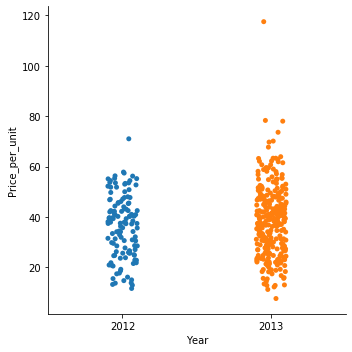

In [17]:
#we can see the distribution by price 
sns.catplot(x = 'Year' , y = 'Price_per_unit' , data =Real_estate)

There is not much difference in years.

In [18]:
#correlation of all variables with Price_per_unit
Real_estate.corrwith(Real_estate['Price_per_unit'])

Price_per_unit      1.000000
House_age          -0.210567
MRT_distance       -0.673613
Conv_store_count    0.571005
Latitude            0.546307
Longitude           0.523287
dtype: float64

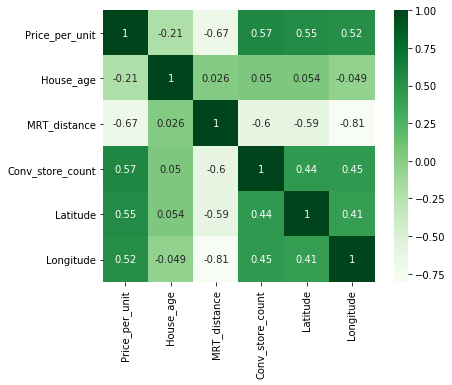

In [19]:
#correlation of all variables
df_corr = Real_estate
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Greens',
            square=True,annot= True, ax=ax)
# Dark shades represents positive correlation while lighter shades represents negative correlation.

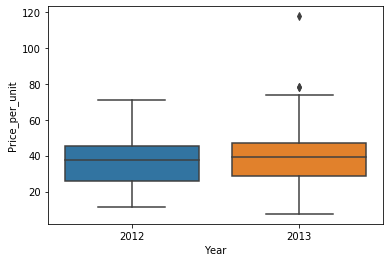

In [23]:
################Outlier Analysis###################
sns.boxplot(x = 'Year' , y = 'Price_per_unit' , data =Real_estate)

In [20]:
#Modelling
X = Real_estate.drop(['Year','Price_per_unit'],axis = 1)
Y = Real_estate['Price_per_unit']

In [21]:
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size =0.2 , random_state = 42)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [24]:
LM = LinearRegression()
LM.fit(X_train,Y_train)
LM.score(X_test ,Y_test)

0.674648138282818

In [25]:
Y_predict = LM.predict(X)

In [27]:
Real_estate['Predicted_price_per_unit'] =  LM.predict(X)

In [28]:
Real_estate.head()

,Year,Price_per_unit,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Predicted_price_per_unit
0,2012,37.9,32.0,84.87882,10,24.98298,121.54024,48.388700
1,2012,42.2,19.5,306.59470,9,24.98034,121.53951,49.050798
2,2013,47.3,13.3,561.98450,5,24.98746,121.54391,46.721137
3,2013,54.8,13.3,561.98450,5,24.98746,121.54391,46.721137
4,2012,43.1,5.0,390.56840,5,24.97937,121.54245,47.872340


We used basic linear regression for training the model with using 20% as test data .Score is 0.67
Next version will try polynomial features and get a better score.

In [29]:
#Using Polynomial features
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)
X_poly_train , X_poly_test ,Y_poly_train , Y_poly_test = train_test_split(X_poly,Y,test_size =0.2 , random_state = 42)
LM_poly = LinearRegression()
LM_poly.fit(X_poly_train,Y_poly_train)
LM_poly.score(X_poly_test ,Y_poly_test)

0.7505332223671985

We can see we got a better score for polynomial regression with degree 2. Lets try for degree 2-10 and see the score values.

In [31]:
polynomial_degree1 = range(2,10)
score = []
for i in polynomial_degree1:
    X1 = Real_estate.drop(['Year','Price_per_unit'],axis = 1)
    Y1 = Real_estate['Price_per_unit']
    pf1 = PolynomialFeatures(degree=i)
    X1_poly = pf1.fit_transform(X1)
    X1_poly_train , X1_poly_test ,Y1_poly_train , Y1_poly_test = train_test_split(X1_poly,Y1,test_size =0.2 , random_state = 42)
    LM1_poly = LinearRegression()
    LM1_poly.fit(X1_poly_train,Y1_poly_train)
    print(LM1_poly.score(X1_poly_test ,Y1_poly_test))

0.750533224223088
0.4599623591731501
-0.6578184106229559
-17.644682425651542
-19081.016751137642
-1243931.511810572
-541839.6858110856
-58264359.89164322


Since values are going negative degree 2 polynomial is a better fit so far.

In [35]:
Real_estate['Predicted_polynomial_price_per_unit'] =  LM_poly.predict(X_poly)
Real_estate

,Year,Price_per_unit,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Predicted_price_per_unit,Predicted_polynomial_price_per_unit
0,2012,37.9,32.0,84.87882,10,24.98298,121.54024,48.388700,47.759916
1,2012,42.2,19.5,306.59470,9,24.98034,121.53951,49.050798,44.660525
2,2013,47.3,13.3,561.98450,5,24.98746,121.54391,46.721137,46.140577
3,2013,54.8,13.3,561.98450,5,24.98746,121.54391,46.721137,46.140577
4,2012,43.1,5.0,390.56840,5,24.97937,121.54245,47.872340,51.556292
...,...,...,...,...,...,...,...,...,...
409,2013,15.4,13.7,4082.01500,0,24.94155,121.50381,15.181887,20.259393
410,2012,50.0,5.6,90.45606,9,24.97433,121.54310,52.291282,55.514128
411,2013,40.6,18.8,390.96960,7,24.97923,121.53986,46.375426,43.020334
412,2013,52.5,8.1,104.81010,5,24.96674,121.54067,45.395111,46.831953
